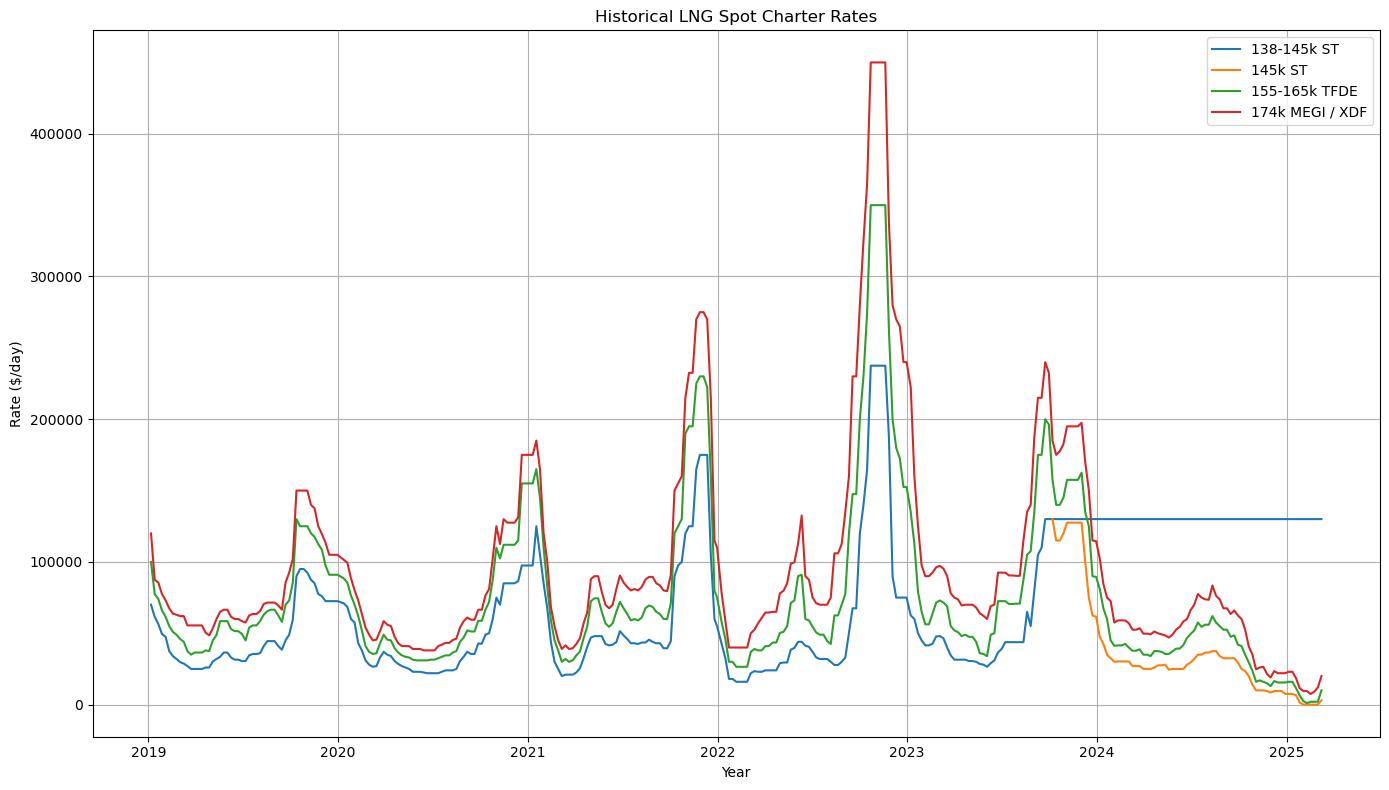

C:\Users\Eier\AppData\Local\Temp\ipykernel_43656\307291573.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


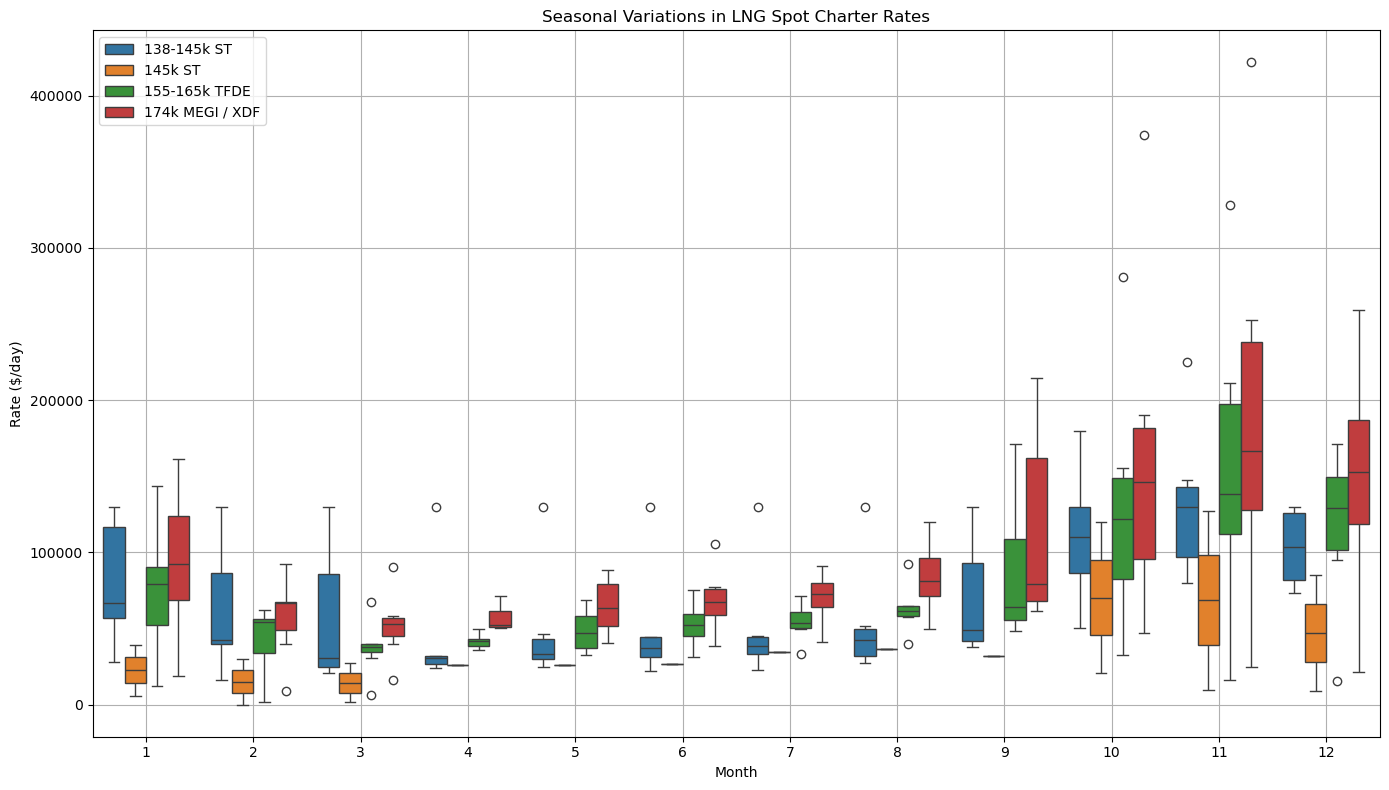

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file
df = pd.read_excel('Spot charter rates - Fearnley LNG.xlsx', sheet_name='Export')

# Ensure correct parsing of date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

# Set date as index
df.set_index('Date', inplace=True)

# Replace missing values with interpolation (optional, for smoother plots)
df.interpolate(method='linear', inplace=True)

# Plot historical trends
plt.figure(figsize=(14, 8))

# Plot each category
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Historical LNG Spot Charter Rates')
plt.xlabel('Year')
plt.ylabel('Rate ($/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot seasonal variations using monthly averages
df_monthly = df.resample('M').mean()
df_monthly['Month'] = df_monthly.index.month

plt.figure(figsize=(14, 8))
sns.boxplot(data=pd.melt(df_monthly, id_vars=['Month'], var_name='Vessel Type', value_name='Rate'),
            x='Month', y='Rate', hue='Vessel Type')

plt.title('Seasonal Variations in LNG Spot Charter Rates')
plt.xlabel('Month')
plt.ylabel('Rate ($/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Sheet names: ['Export']


Available sheets: ['Export']


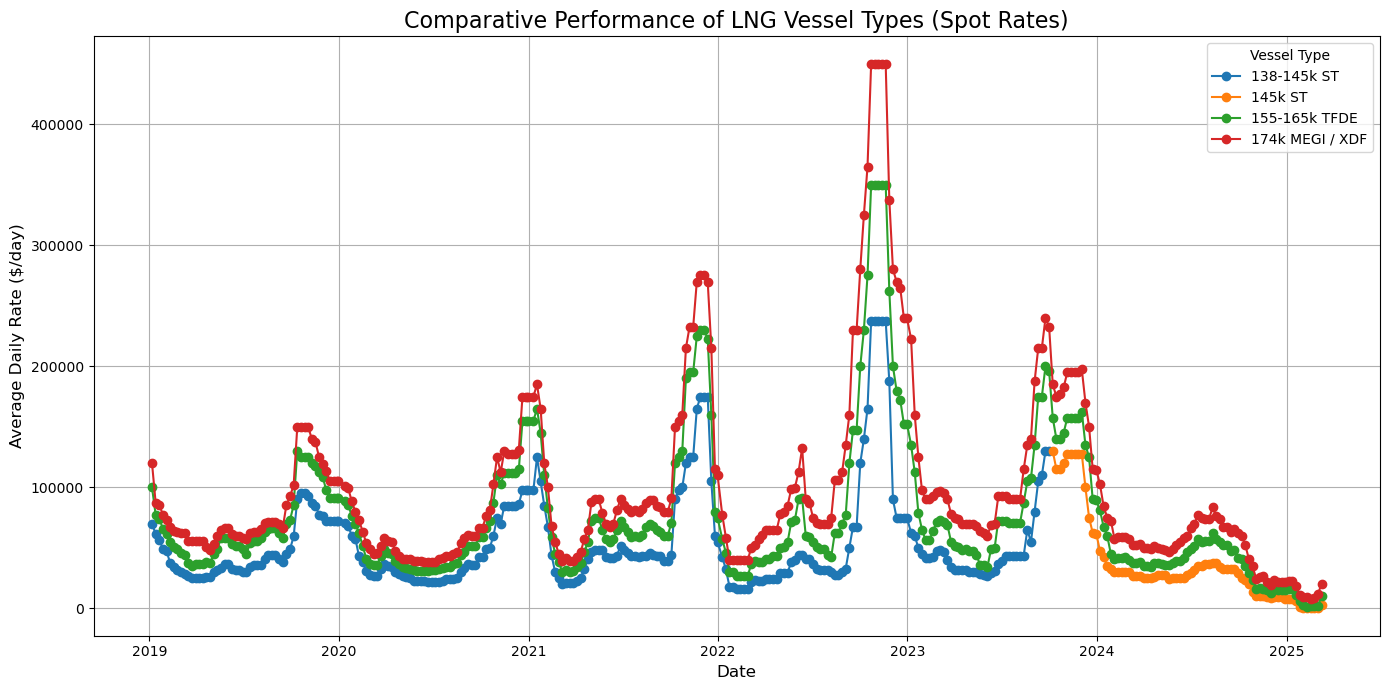

Statistical Summary (Vessel Performance):
          138-145k ST        145k ST  155-165k TFDE  174k MEGI / XDF
count     248.000000      75.000000     323.000000       323.000000
mean    54681.451613   37440.000000   75723.684211     97736.842105
std     41560.097926   36361.033122   59621.705381     75649.822174
min     16000.000000       0.000000    1000.000000      7500.000000
25%     30000.000000   12000.000000   39125.000000     55500.000000
50%     41750.000000   28000.000000   57000.000000     73000.000000
75%     67500.000000   35750.000000   88000.000000    111250.000000
max    237500.000000  130000.000000  350000.000000    450000.000000


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file and inspect sheet names
file_path = 'Spot charter rates - Fearnley LNG.xlsx'
xls = pd.ExcelFile(file_path)
print("Available sheets:", xls.sheet_names)

# Load data from the 'Export' sheet
df = pd.read_excel(xls, sheet_name='Export')

# Convert date columns and clean data
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Ensure numeric columns are properly formatted
vessel_types = ['138-145k ST', '145k ST', '155-165k TFDE', '174k MEGI / XDF']
for vessel in vessel_types:
    df[vessel] = pd.to_numeric(df[vessel], errors='coerce')

# Drop rows with no date
df = df.dropna(subset=['Date']).set_index('Date')

# Plot comparative performance
plt.figure(figsize=(14, 7))
for vessel in vessel_types:
    plt.plot(df.index, df[vessel], marker='o', linestyle='-', label=vessel)

plt.title('Comparative Performance of LNG Vessel Types (Spot Rates)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Daily Rate ($/day)', fontsize=12)
plt.grid(True)
plt.legend(title='Vessel Type')
plt.tight_layout()
plt.show()

# Statistical summary
performance_summary = df[vessel_types].describe()
print("Statistical Summary (Vessel Performance):\n", performance_summary)


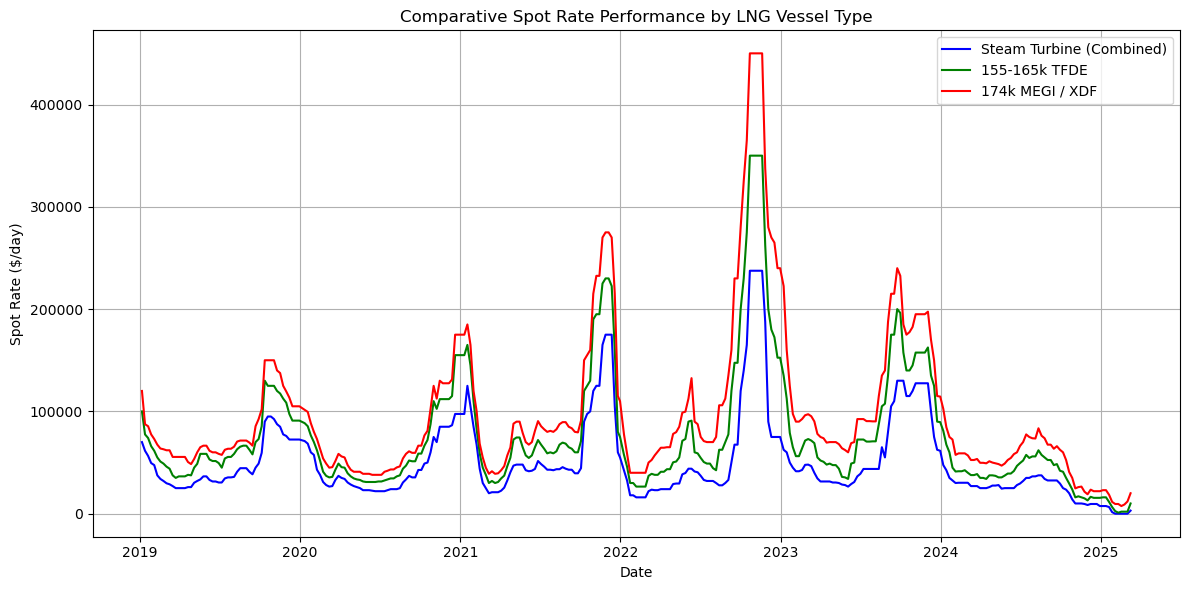

In [18]:
# Re-import necessary libraries due to kernel reset
import pandas as pd
import matplotlib.pyplot as plt

# Re-load the Excel file
file_path = 'Spot charter rates - Fearnley LNG.xlsx'
xls = pd.ExcelFile(file_path)

# Load the correct sheet
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Combine Steam Turbine vessels: "138-145k ST" and "145k ST"
# Use "138-145k ST" data up to 2023-10-01, then "145k ST" data from 2023-10-08 onward
cutoff_date = pd.to_datetime("2023-10-01")
df['Steam Turbine (Combined)'] = df.apply(
    lambda row: row["138-145k ST"] if row["Date"] <= cutoff_date else row["145k ST"],
    axis=1
)

# Plotting the combined series
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Steam Turbine (Combined)'], label='Steam Turbine (Combined)', color='blue')
plt.plot(df['Date'], df['155-165k TFDE'], label='155-165k TFDE', color='green')
plt.plot(df['Date'], df['174k MEGI / XDF'], label='174k MEGI / XDF', color='red')

plt.title('Comparative Spot Rate Performance by LNG Vessel Type')
plt.xlabel('Date')
plt.ylabel('Spot Rate ($/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


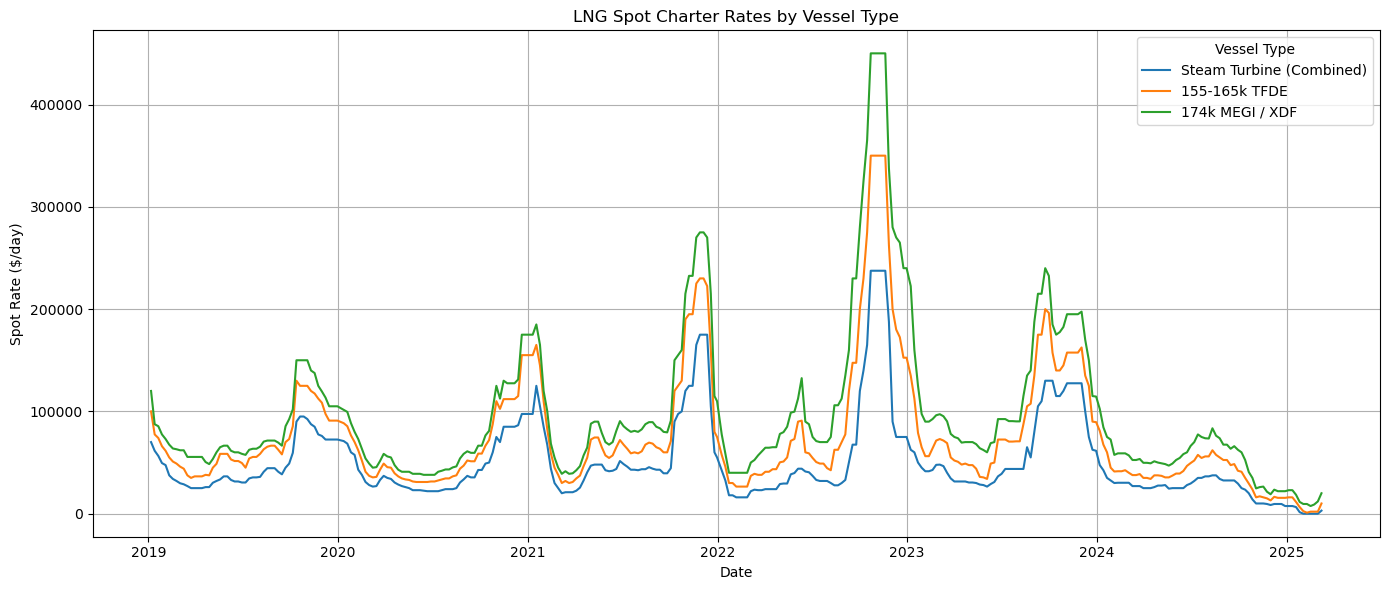

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel("Spot charter rates - Fearnley LNG.xlsx", sheet_name=0)
df.columns = df.columns.str.strip()

# Parse date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Combine Steam Turbine types into one column called 'Steam Turbine (Combined)'
df['Steam Turbine (Combined)'] = df['138-145k ST'].copy()

# From 2023-10-08 onward, use '145k ST' values instead
mask = df['Date'] >= pd.to_datetime('2023-10-08')
df.loc[mask, 'Steam Turbine (Combined)'] = df.loc[mask, '145k ST']

# Store in df_combined for plotting
df_combined = df.copy()

# Reshape to long format
vessel_columns = ['138-145k ST', '145k ST', '155-165k TFDE', '174k MEGI / XDF']
df_long = pd.melt(
    df_combined,
    id_vars=['Date'],
    value_vars=vessel_columns,
    var_name='Vessel Type',
    value_name='Spot Rate ($/day)'
)

# Combine ST labels in long format
df_long['Vessel Type'] = df_long['Vessel Type'].replace({
    '138-145k ST': 'Steam Turbine (Combined)',
    '145k ST': 'Steam Turbine (Combined)'
})

# Drop NaNs
df_long.dropna(subset=['Spot Rate ($/day)'], inplace=True)

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_long, x='Date', y='Spot Rate ($/day)', hue='Vessel Type', palette='tab10')
plt.title('LNG Spot Charter Rates by Vessel Type')
plt.xlabel('Date')
plt.ylabel('Spot Rate ($/day)')
plt.grid(True)
plt.legend(title='Vessel Type')
plt.tight_layout()
plt.show()


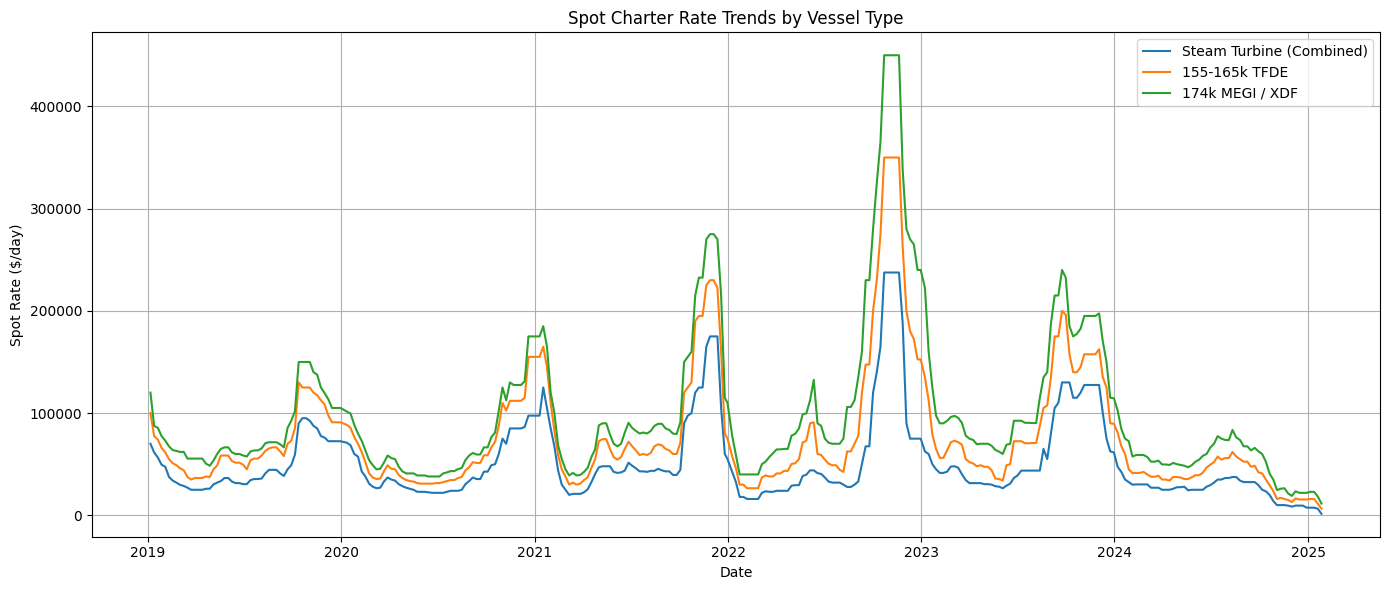


Vessel Performance Summary:

                          Mean_Rate  Median_Rate  Max_Rate  Min_Rate  \
Vessel Type                                                            
155-165k TFDE              77095.43      57500.0  350000.0    6500.0   
174k MEGI / XDF            99373.82      73750.0  450000.0   11500.0   
Steam Turbine (Combined)   51627.76      37000.0  237500.0    1500.0   

                           Std_Dev  Count  
Vessel Type                                
155-165k TFDE             59333.37    317  
174k MEGI / XDF           75409.03    317  
Steam Turbine (Combined)  40806.11    317  

Correlation Matrix Between Vessel Types:

Vessel Type               155-165k TFDE  174k MEGI / XDF  \
Vessel Type                                                
155-165k TFDE                      1.00             0.99   
174k MEGI / XDF                    0.99             1.00   
Steam Turbine (Combined)           0.97             0.94   

Vessel Type               Steam Turbine (Comb

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file
file_path = 'Spot charter rates - Fearnley LNG.xlsx'
df = pd.read_excel(file_path)

# Parse dates and sort
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df = df.sort_values('Date')

# Limit the dataset to dates before or equal to 2025-01-26
cutoff_date = pd.to_datetime('2025-01-26')
df = df[df['Date'] <= cutoff_date]

# Fill forward missing data
df = df.ffill()

# Define switch date for 138-145k ST handover to 145k ST
switch_date = pd.to_datetime('2023-10-08')

# From switch_date onward, set '138-145k ST' to NaN (no more data expected)
df.loc[df['Date'] >= switch_date, '138-145k ST'] = None

# Merge 138-145k ST into 145k ST from switch_date forward
df.loc[df['Date'] >= switch_date, '145k ST'] = df.loc[df['Date'] >= switch_date, '145k ST'].combine_first(
    df.loc[df['Date'] >= switch_date, '138-145k ST'])

# Reshape to long format
vessel_columns = ['138-145k ST', '145k ST', '155-165k TFDE', '174k MEGI / XDF']
df_long = pd.melt(df, id_vars=['Date'], value_vars=vessel_columns,
                  var_name='Vessel Type', value_name='Spot Rate ($/day)')

# Combine into single steam turbine category
df_long['Vessel Type'] = df_long['Vessel Type'].replace({
    '138-145k ST': 'Steam Turbine (Combined)',
    '145k ST': 'Steam Turbine (Combined)'
})

# Drop NaN values
df_long = df_long.dropna(subset=['Spot Rate ($/day)'])

# Plotting
plt.figure(figsize=(14, 6))
for vessel_type in df_long['Vessel Type'].unique():
    subset = df_long[df_long['Vessel Type'] == vessel_type]
    plt.plot(subset['Date'], subset['Spot Rate ($/day)'], label=vessel_type)

plt.title("Spot Charter Rate Trends by Vessel Type")
plt.xlabel("Date")
plt.ylabel("Spot Rate ($/day)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary stats
performance_summary = df_long.groupby('Vessel Type').agg(
    Mean_Rate=('Spot Rate ($/day)', 'mean'),
    Median_Rate=('Spot Rate ($/day)', 'median'),
    Max_Rate=('Spot Rate ($/day)', 'max'),
    Min_Rate=('Spot Rate ($/day)', 'min'),
    Std_Dev=('Spot Rate ($/day)', 'std'),
    Count=('Spot Rate ($/day)', 'count')
).round(2)

print("\nVessel Performance Summary:\n")
print(performance_summary)


# Pivot the long DataFrame to wide format for correlation analysis
df_wide = df_long.pivot(index='Date', columns='Vessel Type', values='Spot Rate ($/day)')

# Compute the correlation matrix
correlation_matrix = df_wide.corr().round(2)

print("\nCorrelation Matrix Between Vessel Types:\n")
print(correlation_matrix)